# <span style="color:DarkOliveGreen">Exploratory Data Analysis on CDX.NA.IG

__Summary:__ <span style="color:Blue">Detection of data patterns: trend, seasonality, clustering, stationarity

In [1]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hurst as hs
import os
from statsmodels.tsa.seasonal import seasonal_decompose
np.random.seed(0)

In [2]:
# User defined names
index = "CDX.NA.IG"
filename = "input_data.csv"
date_col = "Date"

In [3]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\rsingh\Desktop\World Quant\Capstone\GitHub_main\Notebooks


In [4]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

In [5]:
# Read the data
df = pd.read_csv(filename, index_col=date_col)
df.index = pd.to_datetime(df.index)
df.head()

,IG_BO,SPX,VIX,UST_3M,UST_6M,UST_1Y,UST_2Y,UST_3Y,UST_5Y,UST_7Y,UST_10Y,UST_20Y,UST_30Y,IG_MID
Date,,,,,,,,,,,,,,
2012-01-01,1.500,1257.61,23.40,0.02,0.06,0.12,0.25,0.36,0.83,1.35,1.89,2.57,2.89,120.000
2012-01-02,1.500,1257.61,23.40,0.02,0.06,0.12,0.25,0.36,0.83,1.35,1.89,2.57,2.89,120.000
2012-01-03,1.000,1277.06,22.97,0.02,0.06,0.12,0.27,0.40,0.89,1.41,1.97,2.67,2.98,118.000
2012-01-04,1.000,1277.30,22.22,0.02,0.06,0.12,0.25,0.40,0.89,1.43,2.00,2.71,3.03,118.750
2012-01-05,0.917,1281.06,21.48,0.02,0.07,0.11,0.27,0.40,0.88,1.43,2.02,2.74,3.06,120.001


In [6]:
df['IG_MID'].describe()

count    4018.000000
mean       71.199974
std        17.428001
min        43.750000
25%        58.440000
50%        66.929000
75%        81.716750
max       151.798000
Name: IG_MID, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2012-01-01 to 2022-12-31
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   IG_BO    4018 non-null   float64
 1   SPX      4018 non-null   float64
 2   VIX      4018 non-null   float64
 3   UST_3M   4018 non-null   float64
 4   UST_6M   4018 non-null   float64
 5   UST_1Y   4018 non-null   float64
 6   UST_2Y   4018 non-null   float64
 7   UST_3Y   4018 non-null   float64
 8   UST_5Y   4018 non-null   float64
 9   UST_7Y   4018 non-null   float64
 10  UST_10Y  4018 non-null   float64
 11  UST_20Y  4018 non-null   float64
 12  UST_30Y  4018 non-null   float64
 13  IG_MID   4018 non-null   float64
dtypes: float64(14)
memory usage: 470.9 KB


## <span style="color:DarkOliveGreen"> Outlier detection using boxplot

<AxesSubplot:>

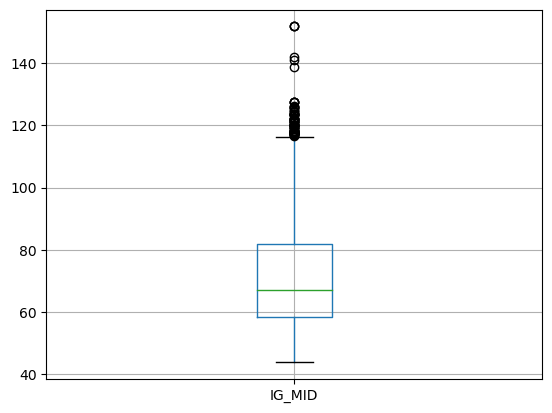

In [8]:
df.boxplot(['IG_MID'])
#df.boxplot(['SPX'])

## <span style="color:DarkOliveGreen">CDX.NA.IG seasonality vs S&P 500

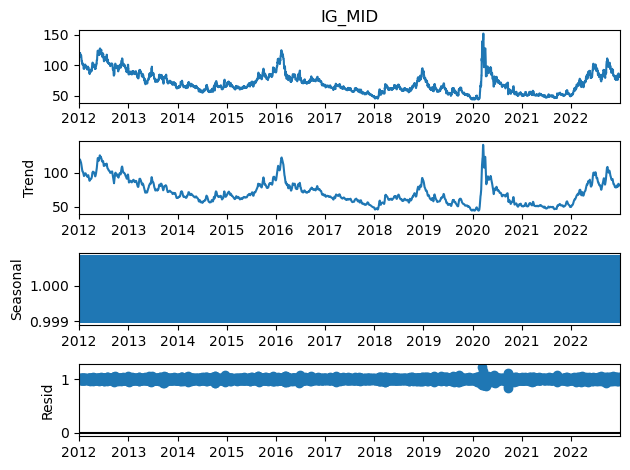

In [51]:
plt.close()
seasonal_decompose(df['IG_MID'], model="multiplicative").plot()
#seasonal_decompose(df['SPX'], model="multiplicative").plot()

## <span style="color:DarkOliveGreen">Rolling volatility (volatility over time) CDX.NA.IG vs S&P 500

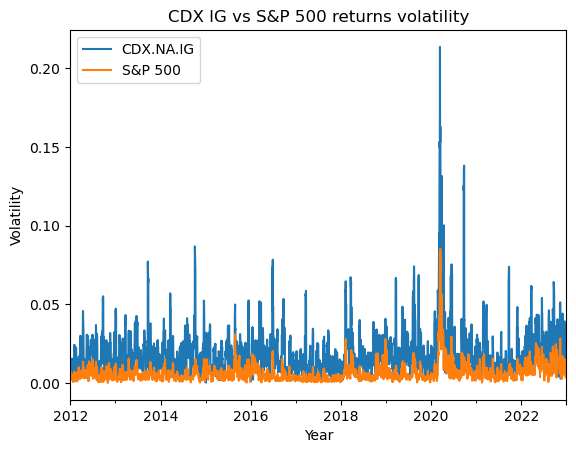

In [11]:
plt.close()
df['IG_MID'].pct_change().rolling(window=5, min_periods=5).std().plot()
ax = df['SPX'].pct_change().rolling(window=5, min_periods=5).std().plot(title="CDX IG vs S&P 500 returns volatility")
ax.set_xlabel("Year")
ax.set_ylabel("Volatility")
ax.legend(["CDX.NA.IG", "S&P 500"])
plt.show()

## <span style="color:DarkOliveGreen"> CDX.NA.IG returns distribution

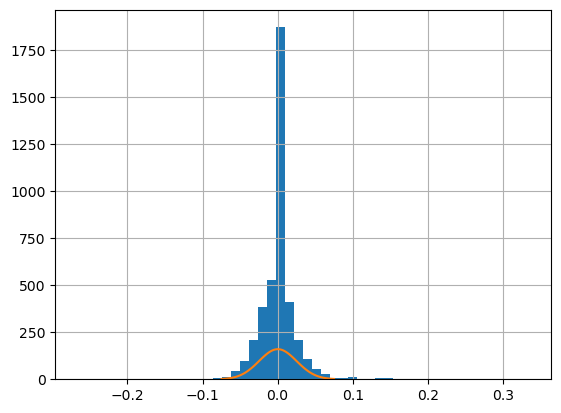

In [12]:
from scipy.stats import norm
plt.close()
df['IG_MID'].pct_change().hist(bins=50)
# best fit of data
(mu, sigma) = norm.fit(df['IG_MID'].pct_change().dropna())
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma) * 10)
ax.set_xlabel("Year")
ax.set_ylabel("Freq")
plt.show()

## <span style="color:DarkOliveGreen"> CDX.NA.IG: Stationarity Study

In [44]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [45]:
check_stationarity(df['IG_MID'].pct_change().dropna())

ADF Statistic: -17.579249
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary


In [46]:
check_stationarity(df['IG_MID'])

ADF Statistic: -3.471254
p-value: 0.008757
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary


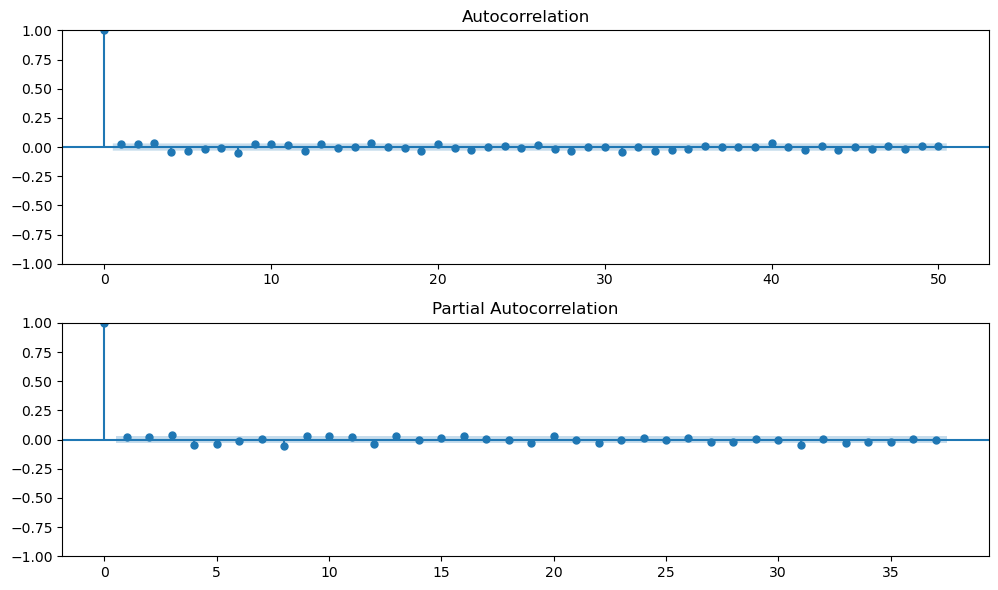

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
plot_acf(df['IG_MID'].pct_change().dropna(), lags=50, ax=ax[0])
plot_pacf(df['IG_MID'].pct_change().dropna(),ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

## <span style="color:DarkOliveGreen"> Regime Detection using Hidden Markov Chain

In [14]:
price = df['IG_MID']

#The first value is NaN as there is not a previous month to compare with
price_diff = price.diff()[1:]

#Replacing the change with 1 if positive, else 0
e_seq = np.array(price_diff.apply(lambda x: 1 if x>0 else 0).values)

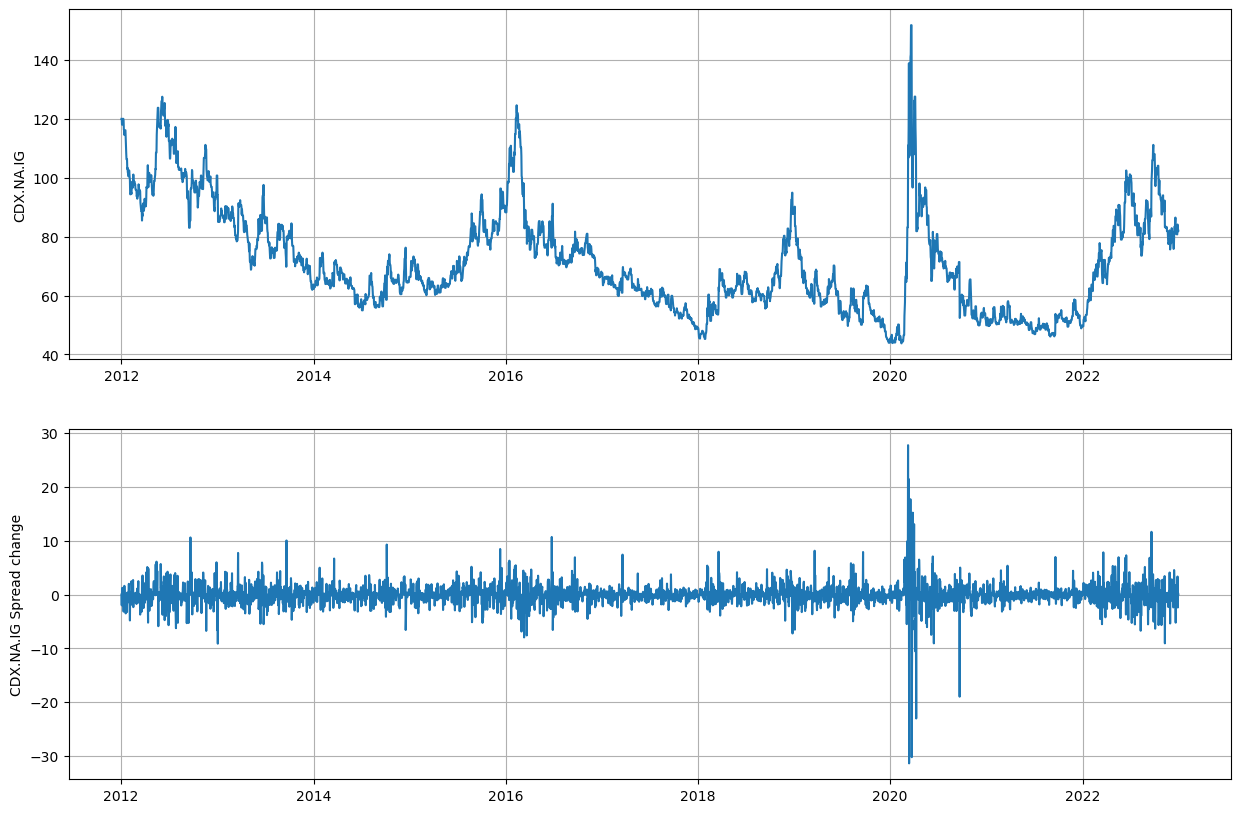

In [19]:
#https://medium.com/@natsunoyuki/hidden-markov-models-with-python-c026f778dfa7
from hmmlearn import hmm
plt.close()
#Use the daily change in CDX.NA.IG price as the observed measurements X
X = np.array(price_diff).reshape(-1, 1)

#Plot the daily CDX.NA.IG prices as well as the daily change.
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
plt.plot(df['IG_MID'])
plt.ylabel("CDX.NA.IG")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(df['IG_MID'].diff()[1:])
plt.ylabel("CDX.NA.IG Spread change")
plt.grid(True)
plt.show()

In [20]:
#Build the HMM model and fit to the oil price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)

# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

print("Unique states:")
print(states)

print("\nStart probabilities:")
print(model.startprob_)

print("\nTransition matrix:")
print(model.transmat_)

print("\nGaussian distribution means:")
print(model.means_)

print("\nGaussian distribution covariances:")
print(model.covars_)

Unique states:
[1 0 2]

Start probabilities:
[2.25568465e-84 1.00000000e+00 9.86356756e-79]

Transition matrix:
[[0.72879767 0.25193163 0.0192707 ]
 [0.33408686 0.52053663 0.14537651]
 [0.23378396 0.14395351 0.62226253]]

Gaussian distribution means:
[[-8.20139593e-02]
 [-1.62014329e-05]
 [ 2.23795684e-01]]

Gaussian distribution covariances:
[[[1.76279787e+00]]

 [[8.18587212e-06]]

 [[2.12248507e+01]]]


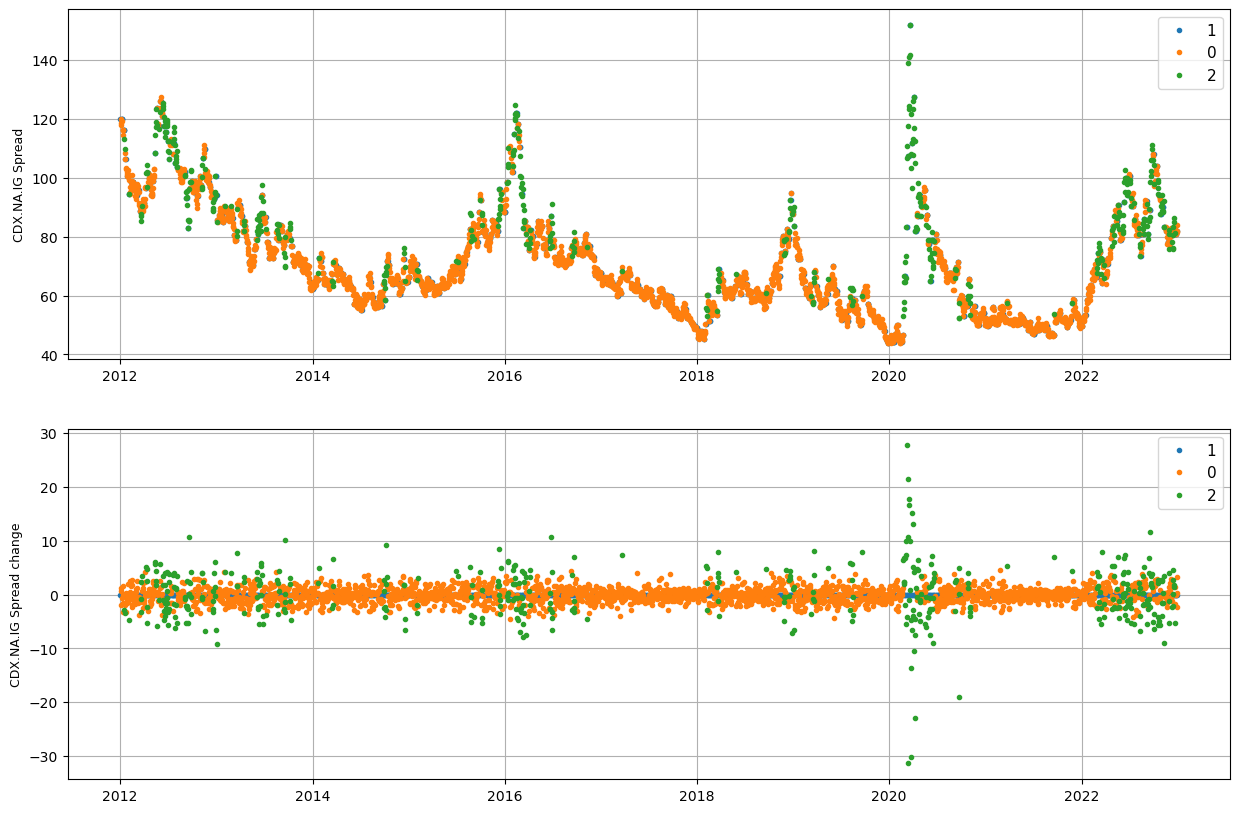

In [29]:
#Plotting the model’s state predictions with the data, we find that the states 0, 1 and 2 appear to correspond to 
#low volatility,medium volatility and high volatility.
plt.close()
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    plt.plot(price[1:][want],'.')
plt.legend(states,fontsize=11)
plt.ylabel("CDX.NA.IG Spread", fontsize=9)
plt.grid(True)

plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    plt.plot(price_diff[want],'.')
plt.legend(states,fontsize=11)
plt.ylabel("CDX.NA.IG Spread change", fontsize=9)
plt.grid(True)
plt.show()

#### Multicoloured time series plot

In [22]:
#Add price
price_plot = pd.DataFrame(price[1:],index=price[1:].index)
#Add a column representing the regime
price_plot['Regime'] = Z
#Add a column representing the increase or decrease in price
price_plot['diff'] = price_diff

In [23]:
#Get means of all assigned states
means = price_plot.groupby(['Regime'])['diff'].mean()
lst_1 = means.index.tolist()
lst_2 = means.sort_values().index.tolist()
map_regimes = dict(zip(lst_2,lst_1))
price_plot['Regime'] = price_plot['Regime'].map(map_regimes)

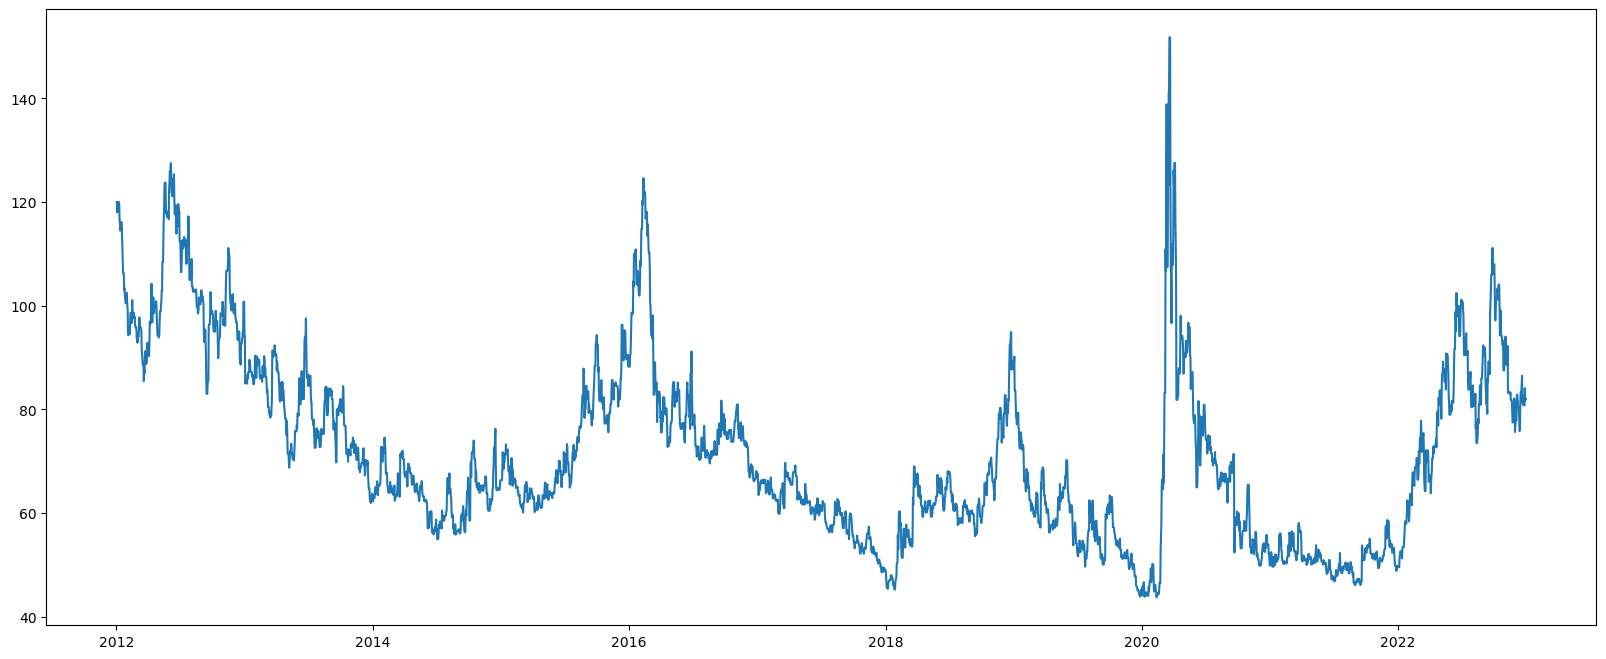

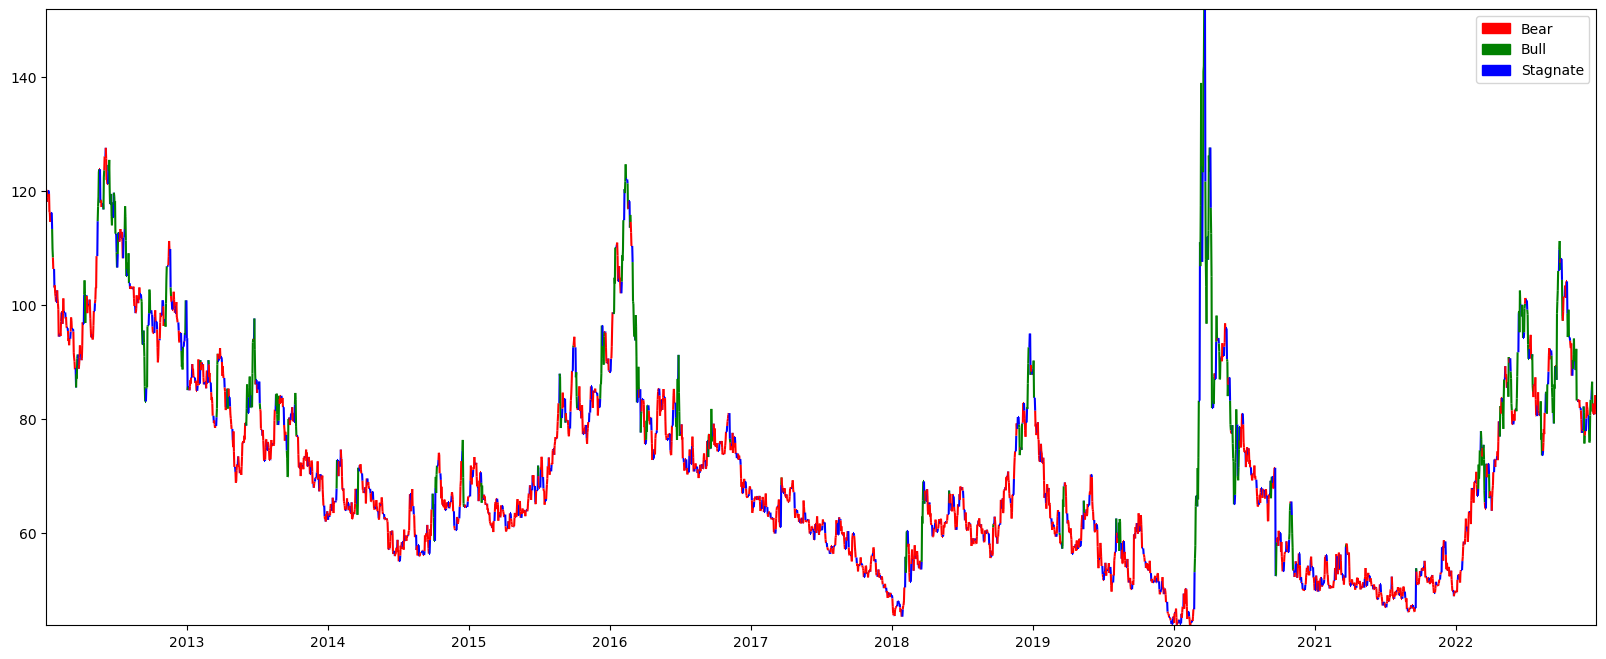

In [24]:
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import Colormap, ListedColormap, BoundaryNorm

fig, ax1 = plt.subplots(figsize=(20,8))
fig, ax = plt.subplots(figsize=(20,8))
ax1.plot(price_plot['IG_MID'])
#Make 0 (Bear) - red, 1 (Stagnant) - blue, 2 (Bull) - green

cmap = ListedColormap(['r','b','g'],'indexed')
norm = BoundaryNorm(range(3 + 1), cmap.N)
inxval = mdates.date2num(price_plot['IG_MID'].index.to_pydatetime())
points = np.array([inxval,price_plot['IG_MID']]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1],points[1:]],axis=1)

lc = LineCollection(segments,cmap=cmap, norm=norm)
lc.set_array(price_plot['Regime'])
plt.gca().add_collection(lc)
plt.xlim(price_plot['IG_MID'].index.min(), price_plot['IG_MID'].index.max())
plt.ylim(price_plot['IG_MID'].min(), price_plot['IG_MID'].max())

r_patch = mpatches.Patch(color='red', label='Bear')
g_patch = mpatches.Patch(color='green', label='Bull')
b_patch = mpatches.Patch(color='blue', label='Stagnate')

plt.legend(handles=[r_patch,g_patch, b_patch])
plt.show()

## <span style="color:DarkOliveGreen">Save Plots

In [ ]:
# Change to Images directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Images")

## <span style="color:DarkOliveGreen">Save the Data

In [ ]:
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")
